In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
fullData = pd.read_csv("31DayData.csv")

myData = fullData[['Quarter', 'HB', 'CancerType','NumberOfEligibleReferrals31DayStandard','NumberOfEligibleReferralsTreatedWithin31Days']]
weekdata = pd.read_csv("ready_cancerdata.csv")

In [23]:
fullData

,Quarter,HB,HBT,HBTQF,CancerType,CancerTypeQF,NumberOfEligibleReferrals31DayStandard,NumberOfEligibleReferrals31DayStandardQF,NumberOfEligibleReferralsTreatedWithin31Days,NumberOfEligibleReferralsTreatedWithin31DaysQF
0,2012Q1,S08000015,S08000015,NaN,Breast,NaN,533,NaN,525,NaN
1,2012Q1,S08000015,S08000015,NaN,Cervical,NaN,352,NaN,353,NaN
2,2012Q1,S08000015,S08000015,NaN,Colorectal,NaN,447,NaN,450,NaN
3,2012Q1,S08000015,S08000015,NaN,Head & Neck,NaN,13,NaN,14,NaN
4,2012Q1,S08000015,S08000015,NaN,Lung,NaN,440,NaN,441,NaN
...,...,...,...,...,...,...,...,...,...,...
16284,2021Q3,S08000032,S92000003,d,Upper GI,NaN,53,p,53,p
16285,2021Q3,S08000032,S92000003,d,Urological,NaN,89,p,84,p
16286,2021Q3,S08000032,S92000003,d,All Cancer Types,d,566,p,557,p
16287,2021Q3,S08000032,SB0801,NaN,Lung,NaN,13,p,13,p


In [24]:
weekdata

,Unnamed: 0,HB,CancerType,Sex,Age Group,Week Number,Count,Quarter,Month,Date
0,0,NCA,All Cancers,Male,All Ages,1,92.0,201902,2,20190201
1,1,NCA,All Cancers,Female,All Ages,1,88.0,201902,2,20190201
2,2,NCA,All Cancers,All,All Ages,1,180.0,201902,2,20190201
3,3,NCA,All Malignant Neoplasms (Excl. C44),Male,All Ages,1,59.0,201902,2,20190201
4,4,NCA,All Malignant Neoplasms (Excl. C44),Female,All Ages,1,66.0,201902,2,20190201
...,...,...,...,...,...,...,...,...,...,...
2014048,2014048,S08000027,Leukaemias,Female,All Ages,53,NaN,202102,6,20210653
2014049,2014049,S08000028,Hodgkin Lymphoma,Female,All Ages,53,NaN,202102,6,20210653
2014050,2014050,S08000028,Pancreas,Male,All Ages,53,NaN,202102,6,20210653
2014051,2014051,S08000028,Pancreas,All,All Ages,53,NaN,202102,6,20210653


In [56]:
def ReigonTypeQuarterSelector(reigonCode, cancerType, quarterSplit):
    typeData = myData[myData['CancerType']== cancerType]
    reigonalData = typeData[typeData['HB'] == reigonCode]
    
    aggregation_functions = {'Quarter':'first', 'HB': 'first', 'CancerType': 'first', 'NumberOfEligibleReferrals31DayStandard': 'sum', 'NumberOfEligibleReferralsTreatedWithin31Days': 'sum'}
    reigonalData = reigonalData.groupby(reigonalData['Quarter'], as_index=False).aggregate(aggregation_functions)
        
    Qs = reigonalData.iloc[:,[0]]
    QsReset = Qs.reset_index()
    Index = min(QsReset.index[QsReset['Quarter'] == quarterSplit].tolist())
    
    PostQ = reigonalData.iloc[Index:,:]
    
    a = PostQ["Quarter"]
    b = PostQ["NumberOfEligibleReferrals31DayStandard"]
    
    return  a, b

def ReigonTypeQuarterSelector_weekly(reigonCode, cancerType, Sex, Agegroup):
    typeData = weekdata[weekdata['CancerType']== cancerType]
    typeData = typeData[typeData['Sex']== Sex ]
    typeData = typeData[typeData['Age Group']== Agegroup]
    
    reigonalData = typeData[typeData['HB'] == reigonCode]
    
    aggregation_functions = {'Quarter':'first', 'HB': 'first', 'CancerType': 'first', 'Count': 'sum', 'Sex': 'first', 'Age Group':'first','Date':'sum'}
    reigonalData = reigonalData.groupby(reigonalData['Quarter'], as_index=False).aggregate(aggregation_functions)

    
    x = reigonalData["Quarter"]
    y = reigonalData["Count"]
    return x, y



In [57]:
x,y=ReigonTypeQuarterSelector('S08000028','All Cancer Types', '2019Q1')

xw,yw=ReigonTypeQuarterSelector_weekly('S08000028','All Cancers', 'All', 'All Ages')


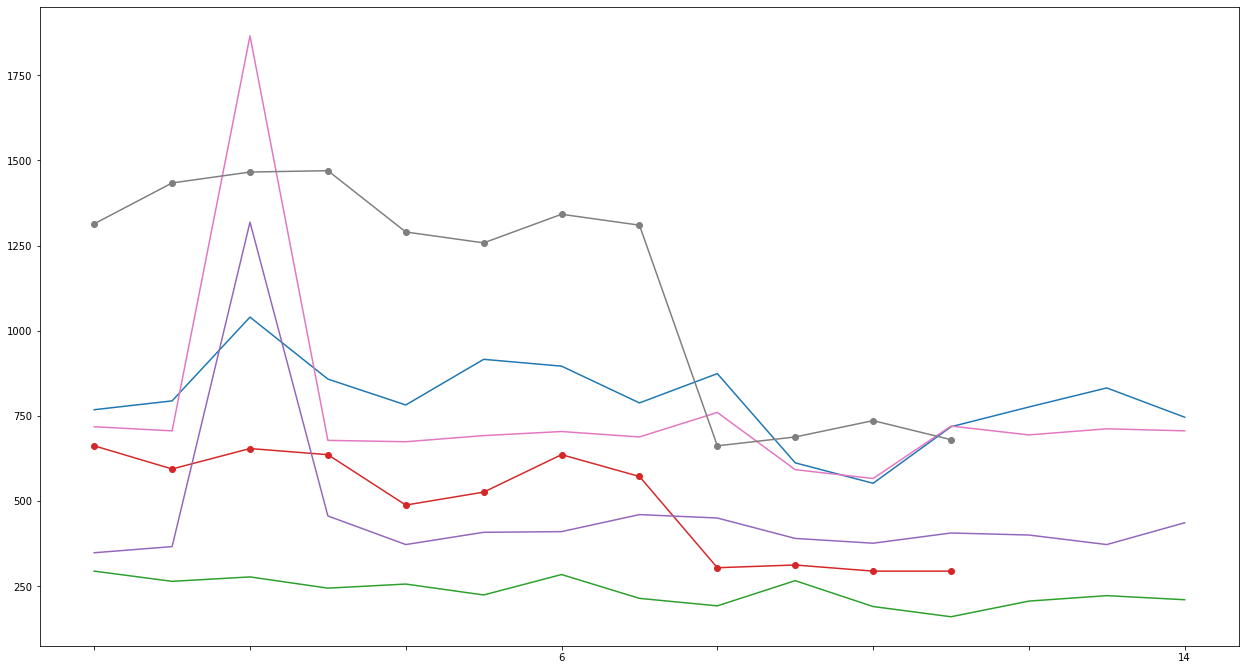

In [62]:
Reigons = ['S08000015', 'S08000016', 'S08000017', 'S08000019']#, 'S08000020', 'S08000022', 'S08000024', 'S08000025', 'S08000026', 'S08000028', 'S08000029', 'S08000030', 'S08000031', 'S08000032']

fig, d1 = plt.subplots(1, 1, sharey=True)

for i in Reigons:
    x, y = ReigonTypeQuarterSelector(i, 'All Cancer Types', '2018Q1')
    
    xw,yw=ReigonTypeQuarterSelector_weekly(i,'All Cancers', 'All', 'All Ages')
    
    d1.plot(np.asarray(y))
    d1.plot(np.asarray(yw),'o-')

every_nth = 4
for n, label in enumerate(d1.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)

fig.set_size_inches(18.5, 10.5, forward=True)
fig.tight_layout(pad=5.0) 
plt.show()